<a href="https://colab.research.google.com/github/RanjithKishore/Handwash/blob/master/handwash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,cv2


In [ ]:
def FrameCapture(pathd,paths,j): 
      
    # Path to video file 
    
    vidObj = cv2.VideoCapture(paths) 
    
    # Used as counter variable 
    
  
    # checks whether frames were extracted 
    success = 1
    count=1
    while success: 
        
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 
        
        # Saves the frames with frame-count 
        if count%232==0:
          print('here')
          #print(pathd)
          path=os.path.join(pathd,'image{}.jpg'.format(count*(j+1)))
          #print('here  '+path)  
          if success: 
            cv2.imwrite(path, image) 
  
        count += 1
   # print(count)

In [ ]:
f = []
f=os.listdir('/content/drive/My Drive/HandWashDataset')
print(f)

['Step_4_Left', 'Step_7_Right', 'Step_1', 'Step_6_Right', 'Step_2_Left', 'Step_3', 'Step_4_Right', 'Step_6_Left', 'Step_2_Right', 'Step_5_Right', 'Step_7_Left', 'Step_5_Left', 'vggtransfer.h5']


In [ ]:
g=[]
for (dirpath, dirnames, filenames) in os.walk('/content/drive/My Drive/HandWashDataset/Step_7_Left'):
    g.extend(filenames)
    break
print(g)

['HandWash_004_A_11_G_01.mp4', 'HandWash_007_A_11_G_01.mp4', 'HandWash_001_A_11_G_01.mp4', 'HandWash_002_A_11_G_01.mp4', 'HandWash_009_A_11_G_02.mp4', 'HandWash_006_A_11_G_01.mp4', 'HandWash_005_A_11_G_01.mp4', 'HandWash_008_A_11_G_01.mp4', 'HandWash_003_A_11_G_01.mp4', 'HandWash_014_A_11_G_03.mp4', 'HandWash_017_A_11_G_04.mp4', 'HandWash_016_A_11_G_04.mp4', 'HandWash_013_A_11_G_03.mp4', 'HandWash_011_A_11_G_02.mp4', 'HandWash_010_A_11_G_02.mp4', 'HandWash_015_A_11_G_04.mp4', 'HandWash_018_A_11_G_05.mp4', 'HandWash_012_A_11_G_03.mp4', 'HandWash_020_A_11_G_05.mp4', 'HandWash_019_A_11_G_05.mp4', 'HandWash_021_A_11_G_05.mp4', 'HandWash_022_A_11_G_05.mp4', 'HandWash_023_A_11_G_05.mp4', 'HandWash_024_A_11_G_05.mp4', 'HandWash_025_A_11_G_05.mp4']


In [ ]:
for i,folder in enumerate(f):
  sdir=os.path.join('/content/drive/My Drive/HandWashDataset',folder)
  dest=os.path.join('/content/drive/My Drive/val',folder)
  os.makedirs(dest)
  g=[]
  print(dest)
  for (dirpath, dirnames, filenames) in os.walk(sdir):
    g.extend(filenames)
    break
 

  for j,v in enumerate(g):
    sour=os.path.join(sdir,v)
    print(sour)
    print(j)
    FrameCapture(dest,sour,j)



In [1]:
tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/HW_image_dataset'
valid_path = '/content/drive/My Drive/val'

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [12]:
folders = glob('/content/drive/My Drive/HW_image_dataset/*')

In [ ]:
print(folders)

In [14]:
x=Flatten()(vgg.output)
pred=Dense(12,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=pred)


In [17]:
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
model.save('/content/drive/My Drive/handwashtransfer.h5')

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4188 images belonging to 12 classes.
Found 310 images belonging to 12 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/25
 79/131 [=================>............] - ETA: 17:26 - loss: 1.6058 - accuracy: 0.5134

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


111/131 [========================>.....] - ETA: 6:50 - loss: 1.3706 - accuracy: 0.5780

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 127 could not be retrieved. It could be because a worker has died.
  UserWarning)


127/131 [============================>.] - ETA: 1:23 - loss: 1.2810 - accuracy: 0.6015

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


131/131 [==============================] - 2840s 22s/step - loss: 1.2655 - accuracy: 0.6053 - val_loss: 0.9946 - val_accuracy: 0.7194
Epoch 2/25
131/131 [==============================] - 147s 1s/step - loss: 0.4875 - accuracy: 0.8391 - val_loss: 0.7401 - val_accuracy: 0.8360
Epoch 3/25
131/131 [==============================] - 157s 1s/step - loss: 0.3580 - accuracy: 0.8785 - val_loss: 0.4855 - val_accuracy: 0.8577
Epoch 4/25
131/131 [==============================] - 157s 1s/step - loss: 0.2609 - accuracy: 0.9090 - val_loss: 0.0696 - val_accuracy: 0.8854
Epoch 5/25
131/131 [==============================] - 158s 1s/step - loss: 0.2559 - accuracy: 0.9169 - val_loss: 0.2582 - val_accuracy: 0.8972
Epoch 6/25
131/131 [==============================] - 157s 1s/step - loss: 0.2271 - accuracy: 0.9226 - val_loss: 0.5976 - val_accuracy: 0.9269
Epoch 7/25
131/131 [==============================] - 161s 1s/step - loss: 0.1565 - accuracy: 0.9446 - val_loss: 0.1221 - val_accuracy: 0.9447
Epoch 8/

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('vggtransfer.h5')

In [20]:
model.load_weights('/content/drive/My Drive/HandWashDataset/vggtransfer.h5')


In [ ]:
#test set with images from step 1 and 3
#os.makedirs('/content/drive/My Drive/test/test_imgs')
FrameCapture('/content/drive/My Drive/test','/content/drive/My Drive/HandWashDataset/Step_3/2.mp4',1)

In [21]:
test_datagen_f = ImageDataGenerator(rescale = 1./255)
test_set_final = test_datagen_f.flow_from_directory('/content/drive/My Drive/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 36 images belonging to 1 classes.


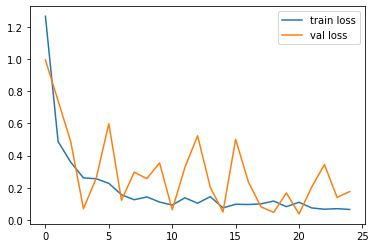

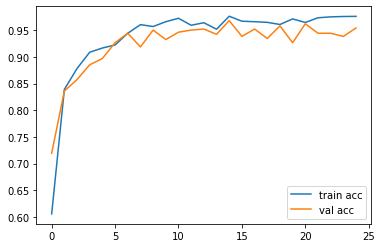

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [22]:
result_pr=model.predict_generator(test_set_final)

In [26]:
for i in range(36):
  print(np.argmax(result_pr[i]))


0
3
0
3
3
3
3
0
0
0
0
3
0
0
3
0
3
3
3
0
0
0
3
0
0
3
3
0
0
3
0
0
0
0
3
0
